## Contraception use and it's impact on Divorce Rates

In [619]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [620]:
#Loading the data
divorce = pd.read_excel(r'/Users/clementngatia/Downloads/Divorce&Contraception/NSFG_2022_2023_FemRespPUFData (Autosaved).xlsx')
divorce.head()

,CaseID,RSCRAGE,RSCRNINF,RSCRHISP,RSCRRACE,FTFMODE,DEVICE_TYPE,AGE_R,AGESCRN,HISP,...,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,CMFIVYR,YEAR,QUARTER,PHASE1,PHASE2,PHASE3
0,96064,29,5,5,3,2,Mobile,29,29,5,...,1474,1441,1429,1417,1426,2,4,1,0,0
1,96066,18,5,1,4,2,PC,18,18,1,...,1471,1441,1429,1417,1423,2,2,1,1,1
2,96068,37,1,5,2,2,Mobile,37,37,5,...,1473,1441,1429,1417,1425,2,4,1,0,0
3,96071,40,1,5,3,2,PC,40,40,5,...,1468,1441,1429,1417,1420,2,2,1,0,0
4,96072,49,1,5,2,2,PC,49,49,5,...,1466,1441,1429,1417,1418,2,1,1,1,0


In [621]:
#exploring the data
divorce.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5586 entries, 0 to 5585
Columns: 1912 entries, CaseID to PHASE3
dtypes: float64(1741), int64(170), object(1)
memory usage: 81.5+ MB


In [622]:
div_to_keep = divorce[['EVRMARRY', #if Respondent (R) has ever been married
                       'MARENDHX_1', #how 1st marriage ended
                       'AGE_R', #age of R
                       'HISPRACE2', #race of R
                       'HXAGEMAR_1', #age of Rs 1st husband
                       'DOLASTWK1', #employment status of R one week prior
                       'INTACT18', #family intact upto 18 yrs of R              
                       'TOTINC', # total R family income per year.
                       'PARMARR', # were bio parents married at birth of R
                       'RELDLIFE', #how important is religion in Rs daily life
                       'REACTSLF', #how R would feel if she got pregnant now
                       'EVERUSED', #has R ever used a contraception method
                       'DRUGDEV', #was contraception method used a drug or device
                       'LVTOGHX_1',#did R cohabit with 1st husband before marriage
                       'CHBOTHER', #how bothered would R be if they never had any (other) children
                       'ABORTION', #has R ever had an induced abortion
                       'EVRCOHAB', #Has R ever cohabited with a man
                       'CURRPREG', #is r currently pregnant
                       'RSURGSTR', #is R surgically sterile
                       'POSIBLPG' #R is physically unable to get children
                       ]]
div_to_keep.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5586 entries, 0 to 5585
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EVRMARRY    5586 non-null   int64  
 1   MARENDHX_1  655 non-null    float64
 2   AGE_R       5586 non-null   int64  
 3   HISPRACE2   5586 non-null   int64  
 4   HXAGEMAR_1  2567 non-null   float64
 5   DOLASTWK1   5585 non-null   float64
 6   INTACT18    5586 non-null   int64  
 7   TOTINC      5475 non-null   float64
 8   PARMARR     5586 non-null   int64  
 9   RELDLIFE    3637 non-null   float64
 10  REACTSLF    4143 non-null   float64
 11  EVERUSED    5586 non-null   int64  
 12  DRUGDEV     4762 non-null   float64
 13  LVTOGHX_1   2565 non-null   float64
 14  CHBOTHER    5585 non-null   float64
 15  ABORTION    3034 non-null   float64
 16  EVRCOHAB    5586 non-null   int64  
 17  CURRPREG    5586 non-null   int64  
 18  RSURGSTR    5586 non-null   int64  
 19  POSIBLPG    4760 non-null  

The study focuses on the number of respondents who have been married and are either still married or have ever divorced. 
In the  recode document, this refers to
EVRMARRY: 
- Distribution Value n
- Never married 0 3024
- Ever married 1 2562 

We will therefore drop those who have never been married from the analysis.

### Descriptive Statistics

In [623]:
#since the data is in integer and float format (representing categorical data points). To find descriptive statistics, 
# we will need to find the mode, rather than the mean of the data.

div_to_keep.mode()

,EVRMARRY,MARENDHX_1,AGE_R,HISPRACE2,HXAGEMAR_1,DOLASTWK1,INTACT18,TOTINC,PARMARR,RELDLIFE,REACTSLF,EVERUSED,DRUGDEV,LVTOGHX_1,CHBOTHER,ABORTION,EVRCOHAB,CURRPREG,RSURGSTR,POSIBLPG
0,0,2.0,32,2,3.0,1.0,1,15.0,1,1.0,1.0,1,1.0,1.0,4.0,0.0,1,5,5,1.0


The data description shows that, most respondents are:
1. EVRMARRY	- In this case, all the people in the df have been married.
2. MARENDHX_1 - The most common method of marriage end was divorce.
3. AGE_R - 37 and 38yr olds were the most interviewed respondents.
4. HISPRACE2 - Most respondents are Non-Hispanic White, Single Race
5. HXAGEMAR_1 - The most frequent husband's age at 1st marriage was 25-29yrs old.
6. DOLASTWK1 - Most respondents work full time or at a business.
7. INTACT18 - Most Rs lived in intact family from birth to age 18.
8. TOTINC - Most families earn a total annual income of $100,000 or more.
9. PARMARR - The parents of most respondents were married at Rs birth.
10. RELIGION - The religion affiliation most common was protestant.
11. REACTSLF - The most common reaction was that the respondent was either sterile or already pregnant.
12. EVERUSED - A majority of the respondents have used contraception.
13. DRUGDEV	- Most of the contraception used was either a drug or device.
14. LVTOGHX_1 - Most respondents cohabited with their first husband before they got married.
15. CHBOTHER - Most Rs would not be bothered at all if they did not have any (additional) children.
16. ABORTION - Most Rs had not had an induced abortion
17. EVRCOHAB - a majority of the Rs have ever cohabited with a non-marital male partner

In [624]:
div_to_keep.AGE_R.mean()

np.float64(32.362871464375225)

In [625]:
# dropping EVRMARRY = 0
div_to_keep = div_to_keep[div_to_keep['EVRMARRY'] != 0]
div_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2562 entries, 3 to 5583
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EVRMARRY    2562 non-null   int64  
 1   MARENDHX_1  654 non-null    float64
 2   AGE_R       2562 non-null   int64  
 3   HISPRACE2   2562 non-null   int64  
 4   HXAGEMAR_1  2562 non-null   float64
 5   DOLASTWK1   2562 non-null   float64
 6   INTACT18    2562 non-null   int64  
 7   TOTINC      2512 non-null   float64
 8   PARMARR     2562 non-null   int64  
 9   RELDLIFE    1778 non-null   float64
 10  REACTSLF    1562 non-null   float64
 11  EVERUSED    2562 non-null   int64  
 12  DRUGDEV     2494 non-null   float64
 13  LVTOGHX_1   2562 non-null   float64
 14  CHBOTHER    2562 non-null   float64
 15  ABORTION    2061 non-null   float64
 16  EVRCOHAB    2562 non-null   int64  
 17  CURRPREG    2562 non-null   int64  
 18  RSURGSTR    2562 non-null   int64  
 19  POSIBLPG    1981 non-null   floa

In [626]:
div_to_keep.head(10)

,EVRMARRY,MARENDHX_1,AGE_R,HISPRACE2,HXAGEMAR_1,DOLASTWK1,INTACT18,TOTINC,PARMARR,RELDLIFE,REACTSLF,EVERUSED,DRUGDEV,LVTOGHX_1,CHBOTHER,ABORTION,EVRCOHAB,CURRPREG,RSURGSTR,POSIBLPG
3,1,NaN,40,2,4.0,1.0,1,15.0,1,NaN,4.0,1,1.0,1.0,2.0,0.0,1,5,5,1.0
4,1,2.0,49,3,2.0,5.0,1,14.0,1,NaN,NaN,1,1.0,5.0,4.0,0.0,5,5,1,NaN
8,1,NaN,44,2,4.0,1.0,1,15.0,1,1.0,4.0,1,1.0,1.0,4.0,NaN,1,5,5,1.0
9,1,2.0,44,2,3.0,1.0,1,14.0,5,2.0,NaN,1,1.0,1.0,4.0,0.0,1,5,1,NaN
11,1,NaN,47,2,5.0,5.0,1,15.0,1,2.0,NaN,1,1.0,1.0,4.0,0.0,1,5,5,1.0
14,1,NaN,37,2,5.0,1.0,1,15.0,1,NaN,3.0,1,1.0,1.0,4.0,0.0,1,5,5,1.0
16,1,2.0,42,2,2.0,1.0,2,8.0,1,NaN,NaN,1,1.0,1.0,4.0,0.0,1,5,5,5.0
19,1,NaN,31,2,3.0,5.0,1,14.0,1,1.0,NaN,1,1.0,5.0,1.0,0.0,5,5,5,5.0
20,1,NaN,33,2,2.0,1.0,1,11.0,1,2.0,4.0,1,1.0,1.0,4.0,0.0,1,5,5,1.0
21,1,2.0,23,1,3.0,1.0,1,4.0,5,1.0,1.0,1,1.0,1.0,4.0,0.0,1,5,5,1.0


### Dealing with Null values

<Axes: >

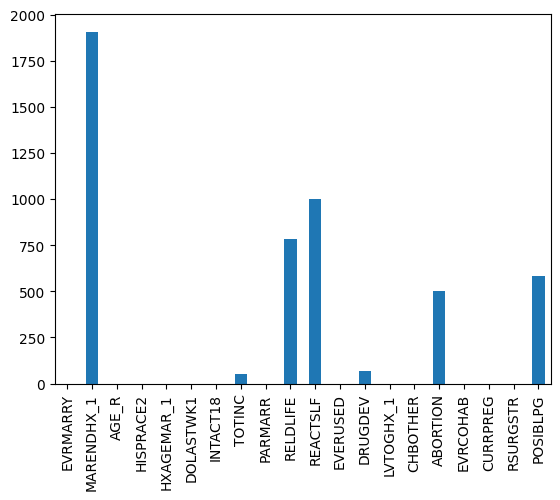

In [627]:
div_to_keep.isna().sum().plot(kind="bar")

In [628]:
#Replacing the null values in MARENDHX_1 with 0 to symbolize 'still married'
div_to_keep['MARENDHX_1'] = div_to_keep['MARENDHX_1'].fillna(0)
div_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2562 entries, 3 to 5583
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EVRMARRY    2562 non-null   int64  
 1   MARENDHX_1  2562 non-null   float64
 2   AGE_R       2562 non-null   int64  
 3   HISPRACE2   2562 non-null   int64  
 4   HXAGEMAR_1  2562 non-null   float64
 5   DOLASTWK1   2562 non-null   float64
 6   INTACT18    2562 non-null   int64  
 7   TOTINC      2512 non-null   float64
 8   PARMARR     2562 non-null   int64  
 9   RELDLIFE    1778 non-null   float64
 10  REACTSLF    1562 non-null   float64
 11  EVERUSED    2562 non-null   int64  
 12  DRUGDEV     2494 non-null   float64
 13  LVTOGHX_1   2562 non-null   float64
 14  CHBOTHER    2562 non-null   float64
 15  ABORTION    2061 non-null   float64
 16  EVRCOHAB    2562 non-null   int64  
 17  CURRPREG    2562 non-null   int64  
 18  RSURGSTR    2562 non-null   int64  
 19  POSIBLPG    1981 non-null   floa

In [629]:
div_to_keep.REACTSLF.value_counts()

REACTSLF
4.0    433
1.0    315
2.0    311
3.0    245
5.0    229
8.0     18
9.0     11
Name: count, dtype: int64

In [630]:
#replacing some null values in REACTSLF with 6 to symbolize currently sterile, 7 to rep currently preg and 10 to rep 'not possible to have kids.
div_to_keep.loc[(div_to_keep.RSURGSTR == 1), 'REACTSLF'] = 6
div_to_keep.loc[(div_to_keep.CURRPREG == 1), 'REACTSLF'] = 7
div_to_keep.loc[(div_to_keep.POSIBLPG == 5), 'REACTSLF'] = 10
div_to_keep.REACTSLF.isna().sum()

np.int64(254)

In [631]:
#filling reaction with 0 to symbolize other reaction.
div_to_keep['REACTSLF'] = div_to_keep['REACTSLF'].fillna(0)
div_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2562 entries, 3 to 5583
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EVRMARRY    2562 non-null   int64  
 1   MARENDHX_1  2562 non-null   float64
 2   AGE_R       2562 non-null   int64  
 3   HISPRACE2   2562 non-null   int64  
 4   HXAGEMAR_1  2562 non-null   float64
 5   DOLASTWK1   2562 non-null   float64
 6   INTACT18    2562 non-null   int64  
 7   TOTINC      2512 non-null   float64
 8   PARMARR     2562 non-null   int64  
 9   RELDLIFE    1778 non-null   float64
 10  REACTSLF    2562 non-null   float64
 11  EVERUSED    2562 non-null   int64  
 12  DRUGDEV     2494 non-null   float64
 13  LVTOGHX_1   2562 non-null   float64
 14  CHBOTHER    2562 non-null   float64
 15  ABORTION    2061 non-null   float64
 16  EVRCOHAB    2562 non-null   int64  
 17  CURRPREG    2562 non-null   int64  
 18  RSURGSTR    2562 non-null   int64  
 19  POSIBLPG    1981 non-null   floa

In [632]:
div_to_keep.REACTSLF.isna().sum()

np.int64(0)

In [633]:
#dropping the pregnancy, surgically sterile and possibility of pregnancy features since they have been used to inform another column.
div_to_keep.drop(['CURRPREG', 'RSURGSTR', 'POSIBLPG', 'EVRMARRY'], axis=1, inplace = True)

In [634]:
#replacing the null values in RELDLIFE with 0 to symbolize 'Not religious'
div_to_keep['RELDLIFE'] = div_to_keep['RELDLIFE'].fillna(0)
div_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2562 entries, 3 to 5583
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MARENDHX_1  2562 non-null   float64
 1   AGE_R       2562 non-null   int64  
 2   HISPRACE2   2562 non-null   int64  
 3   HXAGEMAR_1  2562 non-null   float64
 4   DOLASTWK1   2562 non-null   float64
 5   INTACT18    2562 non-null   int64  
 6   TOTINC      2512 non-null   float64
 7   PARMARR     2562 non-null   int64  
 8   RELDLIFE    2562 non-null   float64
 9   REACTSLF    2562 non-null   float64
 10  EVERUSED    2562 non-null   int64  
 11  DRUGDEV     2494 non-null   float64
 12  LVTOGHX_1   2562 non-null   float64
 13  CHBOTHER    2562 non-null   float64
 14  ABORTION    2061 non-null   float64
 15  EVRCOHAB    2562 non-null   int64  
dtypes: float64(10), int64(6)
memory usage: 340.3 KB


In [635]:
# filling the missing values of the 'Abortion' and 'drugdev' with the mode since they are categorical datapoints
div_to_keep['ABORTION'] = div_to_keep['ABORTION'].fillna(0.0)
div_to_keep['DRUGDEV'] = div_to_keep['DRUGDEV'].fillna(1.0)

In [636]:
# filling the missing values of TOTINC with 98 that represents 'refused' since respondents broke off before responding.
div_to_keep['TOTINC'] = div_to_keep['TOTINC'].fillna(98)

In [637]:
div_to_keep.EVERUSED.isna().sum()

np.int64(0)

In [638]:
pip install missingno


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [639]:
import missingno as msno

<Axes: >

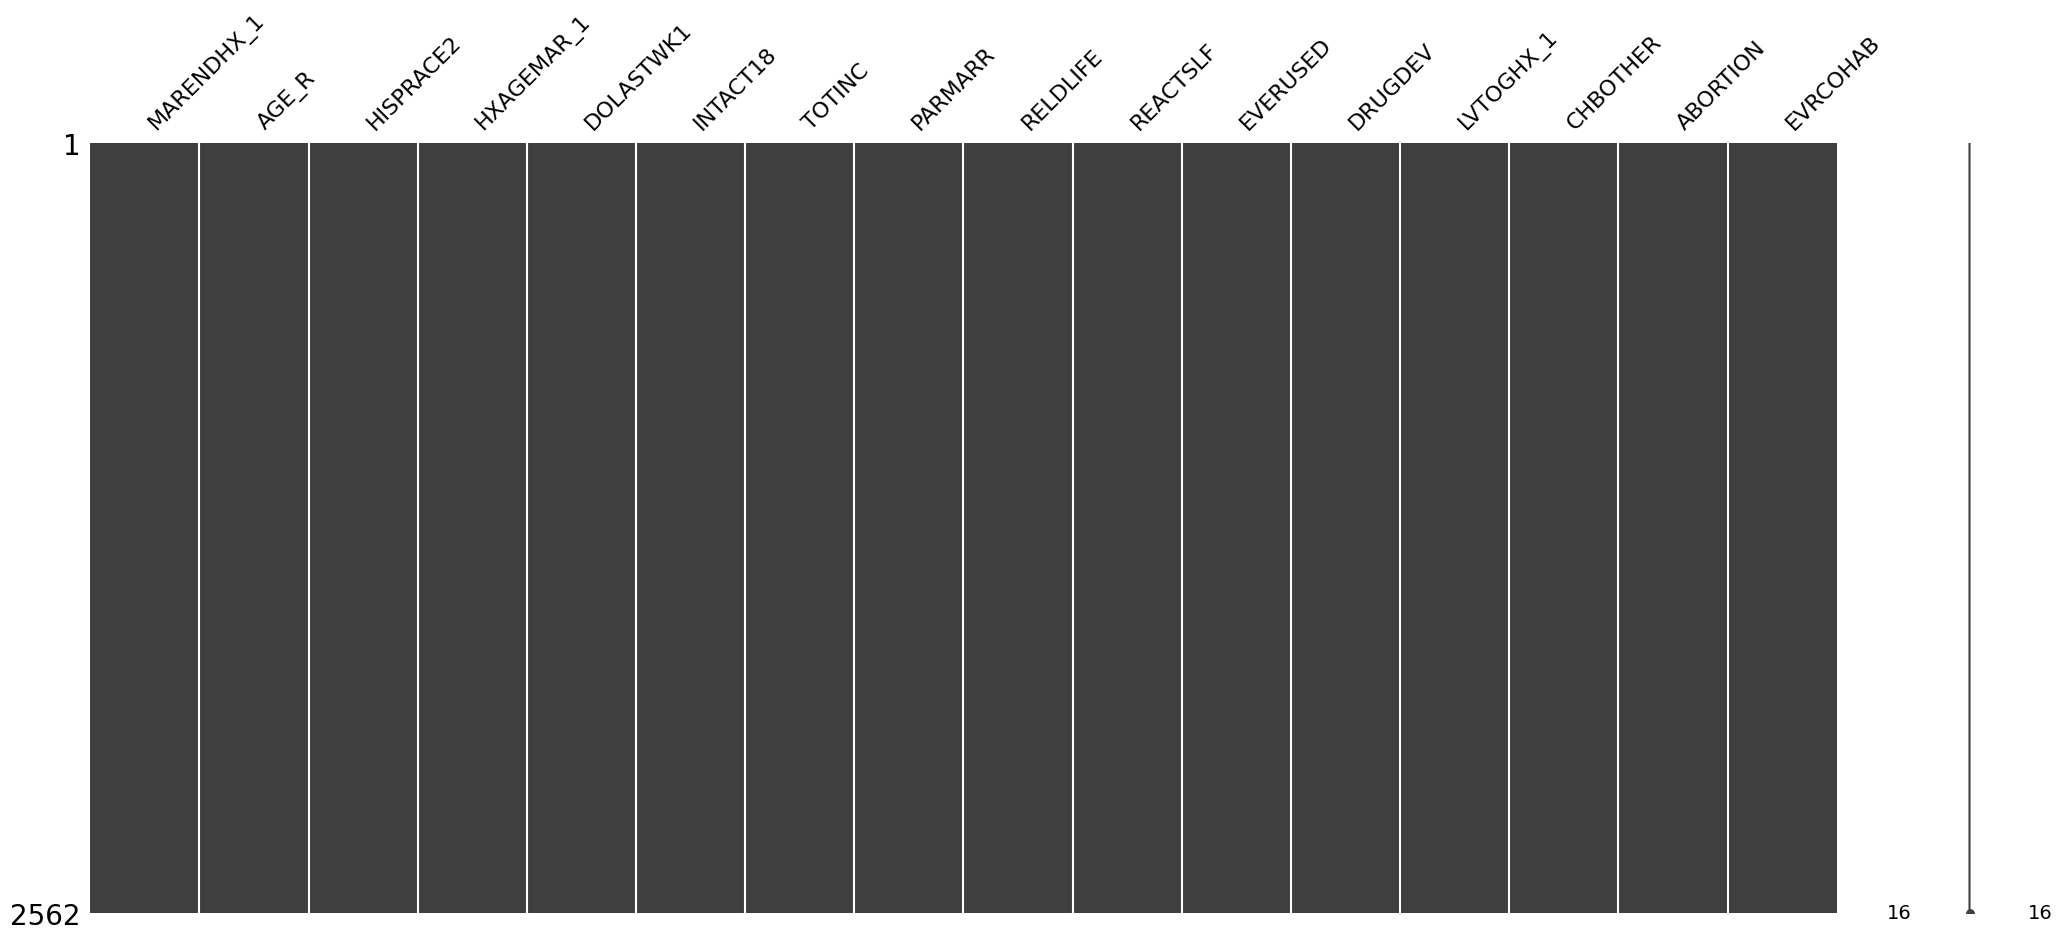

In [640]:
#confirming there are no more missing values
msno.matrix(div_to_keep)

All missing values have been filled in based on data recode provided by interviewer as well as other measures of central tendency.

In [641]:
#creating a copy that we will use for later on
div_to_keep_copy = div_to_keep.copy()
div_to_keep_copy

,MARENDHX_1,AGE_R,HISPRACE2,HXAGEMAR_1,DOLASTWK1,INTACT18,TOTINC,PARMARR,RELDLIFE,REACTSLF,EVERUSED,DRUGDEV,LVTOGHX_1,CHBOTHER,ABORTION,EVRCOHAB
3,0.0,40,2,4.0,1.0,1,15.0,1,0.0,4.0,1,1.0,1.0,2.0,0.0,1
4,2.0,49,3,2.0,5.0,1,14.0,1,0.0,6.0,1,1.0,5.0,4.0,0.0,5
8,0.0,44,2,4.0,1.0,1,15.0,1,1.0,4.0,1,1.0,1.0,4.0,0.0,1
9,2.0,44,2,3.0,1.0,1,14.0,5,2.0,6.0,1,1.0,1.0,4.0,0.0,1
11,0.0,47,2,5.0,5.0,1,15.0,1,2.0,0.0,1,1.0,1.0,4.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,0.0,43,4,5.0,1.0,1,11.0,1,2.0,6.0,1,1.0,5.0,4.0,0.0,5
5574,2.0,41,1,2.0,1.0,1,15.0,1,1.0,5.0,1,1.0,5.0,4.0,0.0,5
5579,0.0,37,3,3.0,1.0,1,98.0,1,1.0,5.0,1,1.0,1.0,4.0,0.0,1
5582,0.0,46,2,2.0,1.0,2,4.0,1,1.0,10.0,1,1.0,5.0,4.0,0.0,5


In [642]:
#retaining only the married and divorced data to use later on in modelling.
div_to_keep_copy = div_to_keep_copy.loc[(div_to_keep_copy.MARENDHX_1 == 0.0) | (div_to_keep_copy.MARENDHX_1 == 2.0)]

In [643]:
div_to_keep_copy.MARENDHX_1.value_counts()

MARENDHX_1
0.0    1908
2.0     608
Name: count, dtype: int64

## Exploratory Data Analysis

In [644]:
#let's reverse encode the details of the labels
#RACE
reverse_mapping = {1: 'hispanic', 2: 'white', 3: 'black', 4: 'other'}
div_to_keep['HISPRACE2'] = div_to_keep['HISPRACE2'].map(reverse_mapping)
#INTACT18
reverse_mapping = {1: 'yes', 2: 'no', 8: 'refused', 9: 'dk'}
div_to_keep['INTACT18'] = div_to_keep['INTACT18'].map(reverse_mapping)
#HXAGEMAR_1
reverse_mapping = {1: '<20', 2: '20-24', 3: '25-29', 4: '30-34', 5: '35-39', 6: '>=40', 98: 'refused', 99: 'dk'}
div_to_keep['HXAGEMAR_1'] = div_to_keep['HXAGEMAR_1'].map(reverse_mapping)
#PARMARR
reverse_mapping = {1: 'yes', 5: 'no', 8: 'refused', 9: 'dk'}
div_to_keep['PARMARR'] = div_to_keep['PARMARR'].map(reverse_mapping)
#DOLASTWK1
reverse_mapping = {1: 'work', 2: 'temp', 3: 'search', 4: 'sch', 5: 'home', 6: 'other', 8: 'refused', 9: 'dk'}
div_to_keep['DOLASTWK1'] = div_to_keep['DOLASTWK1'].map(reverse_mapping)
#TOTINC
reverse_mapping = {1: '<5k', 2: '5-7.5k', 3: '7.5-10k', 4: '10-12.5k', 5: '12.5-15k', 6: '15-20k', 
                   7: '20-25k', 8: '25-30k', 9: '30-35k', 10: '35-40k', 11: '40-50k', 12: '50-60k',
                    13: '60-75k', 14: '75-100k', 15: '>100k', 98: 'refused', 99: 'dk'}
div_to_keep['TOTINC'] = div_to_keep['TOTINC'].map(reverse_mapping)
#DRUGDEV
reverse_mapping = {1: 'yes', 5: 'no', 98: 'refused', 99: 'dk'}
div_to_keep['DRUGDEV'] = div_to_keep['DRUGDEV'].map(reverse_mapping)
#RELDLIFE
reverse_mapping = {1: 'very', 2: 'somewhat', 3: 'not', 8: 'refused', 9: 'dk'}
div_to_keep['RELDLIFE'] = div_to_keep['RELDLIFE'].map(reverse_mapping)
#EVRCOHAB
reverse_mapping = {1: 'yes', 5: 'no'}
div_to_keep['EVRCOHAB'] = div_to_keep['EVRCOHAB'].map(reverse_mapping)
#REACTSLF
reverse_mapping = {0: 'other',1: 'vupset', 2: 'lupset', 3: 'lpleased', 4: 'vpleased', 5: 'neither', 6: 'sterile', 7: 'pregnant',  8: 'refused', 9: 'dk', 10: 'canthkids'}
div_to_keep['REACTSLF'] = div_to_keep['REACTSLF'].map(reverse_mapping)
#CHBOTHER
reverse_mapping = {1: 'very', 2: 'some', 3: 'little', 4: 'not', 8: 'refused', 9: 'dk'}
div_to_keep['CHBOTHER'] = div_to_keep['CHBOTHER'].map(reverse_mapping)
#LVTOGHX_1
reverse_mapping = {1: 'yes', 5: 'no', 8: 'refused'}
div_to_keep['LVTOGHX_1'] = div_to_keep['LVTOGHX_1'].map(reverse_mapping)
#EVERUSED
reverse_mapping = {1: 'yes', 5: 'no', 7: 'unsure'}
div_to_keep['EVERUSED'] = div_to_keep['EVERUSED'].map(reverse_mapping)

div_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2562 entries, 3 to 5583
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MARENDHX_1  2562 non-null   float64
 1   AGE_R       2562 non-null   int64  
 2   HISPRACE2   2562 non-null   object 
 3   HXAGEMAR_1  2562 non-null   object 
 4   DOLASTWK1   2562 non-null   object 
 5   INTACT18    2562 non-null   object 
 6   TOTINC      2562 non-null   object 
 7   PARMARR     2562 non-null   object 
 8   RELDLIFE    1778 non-null   object 
 9   REACTSLF    2562 non-null   object 
 10  EVERUSED    2562 non-null   object 
 11  DRUGDEV     2562 non-null   object 
 12  LVTOGHX_1   2562 non-null   object 
 13  CHBOTHER    2562 non-null   object 
 14  ABORTION    2562 non-null   float64
 15  EVRCOHAB    2562 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 340.3+ KB


In [645]:
div_to_keep['RELDLIFE'] = div_to_keep['RELDLIFE'].fillna('norelg')
div_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2562 entries, 3 to 5583
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MARENDHX_1  2562 non-null   float64
 1   AGE_R       2562 non-null   int64  
 2   HISPRACE2   2562 non-null   object 
 3   HXAGEMAR_1  2562 non-null   object 
 4   DOLASTWK1   2562 non-null   object 
 5   INTACT18    2562 non-null   object 
 6   TOTINC      2562 non-null   object 
 7   PARMARR     2562 non-null   object 
 8   RELDLIFE    2562 non-null   object 
 9   REACTSLF    2562 non-null   object 
 10  EVERUSED    2562 non-null   object 
 11  DRUGDEV     2562 non-null   object 
 12  LVTOGHX_1   2562 non-null   object 
 13  CHBOTHER    2562 non-null   object 
 14  ABORTION    2562 non-null   float64
 15  EVRCOHAB    2562 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 340.3+ KB


In [646]:
#dropping all the values that are neither still married to their first husbands nor divorced.
div_to_keep = div_to_keep.loc[(div_to_keep.MARENDHX_1 == 0.0) | (div_to_keep.MARENDHX_1 == 2.0)]
div_to_keep.MARENDHX_1.value_counts()

MARENDHX_1
0.0    1908
2.0     608
Name: count, dtype: int64

In [647]:
div_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 3 to 5583
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MARENDHX_1  2516 non-null   float64
 1   AGE_R       2516 non-null   int64  
 2   HISPRACE2   2516 non-null   object 
 3   HXAGEMAR_1  2516 non-null   object 
 4   DOLASTWK1   2516 non-null   object 
 5   INTACT18    2516 non-null   object 
 6   TOTINC      2516 non-null   object 
 7   PARMARR     2516 non-null   object 
 8   RELDLIFE    2516 non-null   object 
 9   REACTSLF    2516 non-null   object 
 10  EVERUSED    2516 non-null   object 
 11  DRUGDEV     2516 non-null   object 
 12  LVTOGHX_1   2516 non-null   object 
 13  CHBOTHER    2516 non-null   object 
 14  ABORTION    2516 non-null   float64
 15  EVRCOHAB    2516 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 334.2+ KB


In [648]:
#Doing analysis starting with those who are still married to their first husbands.
div_married=div_to_keep.loc[(div_to_keep.MARENDHX_1 == 0.0)]
div_married

,MARENDHX_1,AGE_R,HISPRACE2,HXAGEMAR_1,DOLASTWK1,INTACT18,TOTINC,PARMARR,RELDLIFE,REACTSLF,EVERUSED,DRUGDEV,LVTOGHX_1,CHBOTHER,ABORTION,EVRCOHAB
3,0.0,40,white,30-34,work,yes,>100k,yes,norelg,vpleased,yes,yes,yes,some,0.0,yes
8,0.0,44,white,30-34,work,yes,>100k,yes,very,vpleased,yes,yes,yes,not,0.0,yes
11,0.0,47,white,35-39,home,yes,>100k,yes,somewhat,other,yes,yes,yes,not,0.0,yes
14,0.0,37,white,35-39,work,yes,>100k,yes,norelg,lpleased,yes,yes,yes,not,0.0,yes
19,0.0,31,white,25-29,home,yes,75-100k,yes,very,canthkids,yes,yes,no,very,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0.0,42,black,30-34,work,yes,>100k,yes,norelg,lupset,yes,yes,yes,not,0.0,yes
5573,0.0,43,other,35-39,work,yes,40-50k,yes,somewhat,sterile,yes,yes,no,not,0.0,no
5579,0.0,37,black,25-29,work,yes,refused,yes,very,neither,yes,yes,yes,not,0.0,yes
5582,0.0,46,white,20-24,work,no,10-12.5k,yes,very,canthkids,yes,yes,no,not,0.0,no


This shows that 1908 respondents are still married to their first husbands and have never been divorced/widowed.
This number also includes those who are separated but married.

We will explore the div_married to find out the demographics of the data. We'll start by dropping the EVMARRY and MARENDHX_1 since they all have the same values.

In [649]:
#dropping the EVMARRY and MARENDHX_1 columns
div_married = div_married.drop([ 'MARENDHX_1'], axis=1)
div_married

,AGE_R,HISPRACE2,HXAGEMAR_1,DOLASTWK1,INTACT18,TOTINC,PARMARR,RELDLIFE,REACTSLF,EVERUSED,DRUGDEV,LVTOGHX_1,CHBOTHER,ABORTION,EVRCOHAB
3,40,white,30-34,work,yes,>100k,yes,norelg,vpleased,yes,yes,yes,some,0.0,yes
8,44,white,30-34,work,yes,>100k,yes,very,vpleased,yes,yes,yes,not,0.0,yes
11,47,white,35-39,home,yes,>100k,yes,somewhat,other,yes,yes,yes,not,0.0,yes
14,37,white,35-39,work,yes,>100k,yes,norelg,lpleased,yes,yes,yes,not,0.0,yes
19,31,white,25-29,home,yes,75-100k,yes,very,canthkids,yes,yes,no,very,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,42,black,30-34,work,yes,>100k,yes,norelg,lupset,yes,yes,yes,not,0.0,yes
5573,43,other,35-39,work,yes,40-50k,yes,somewhat,sterile,yes,yes,no,not,0.0,no
5579,37,black,25-29,work,yes,refused,yes,very,neither,yes,yes,yes,not,0.0,yes
5582,46,white,20-24,work,no,10-12.5k,yes,very,canthkids,yes,yes,no,not,0.0,no


#### Univariate Analysis of 'Still Married'(MARENDHX_1= 0.0)

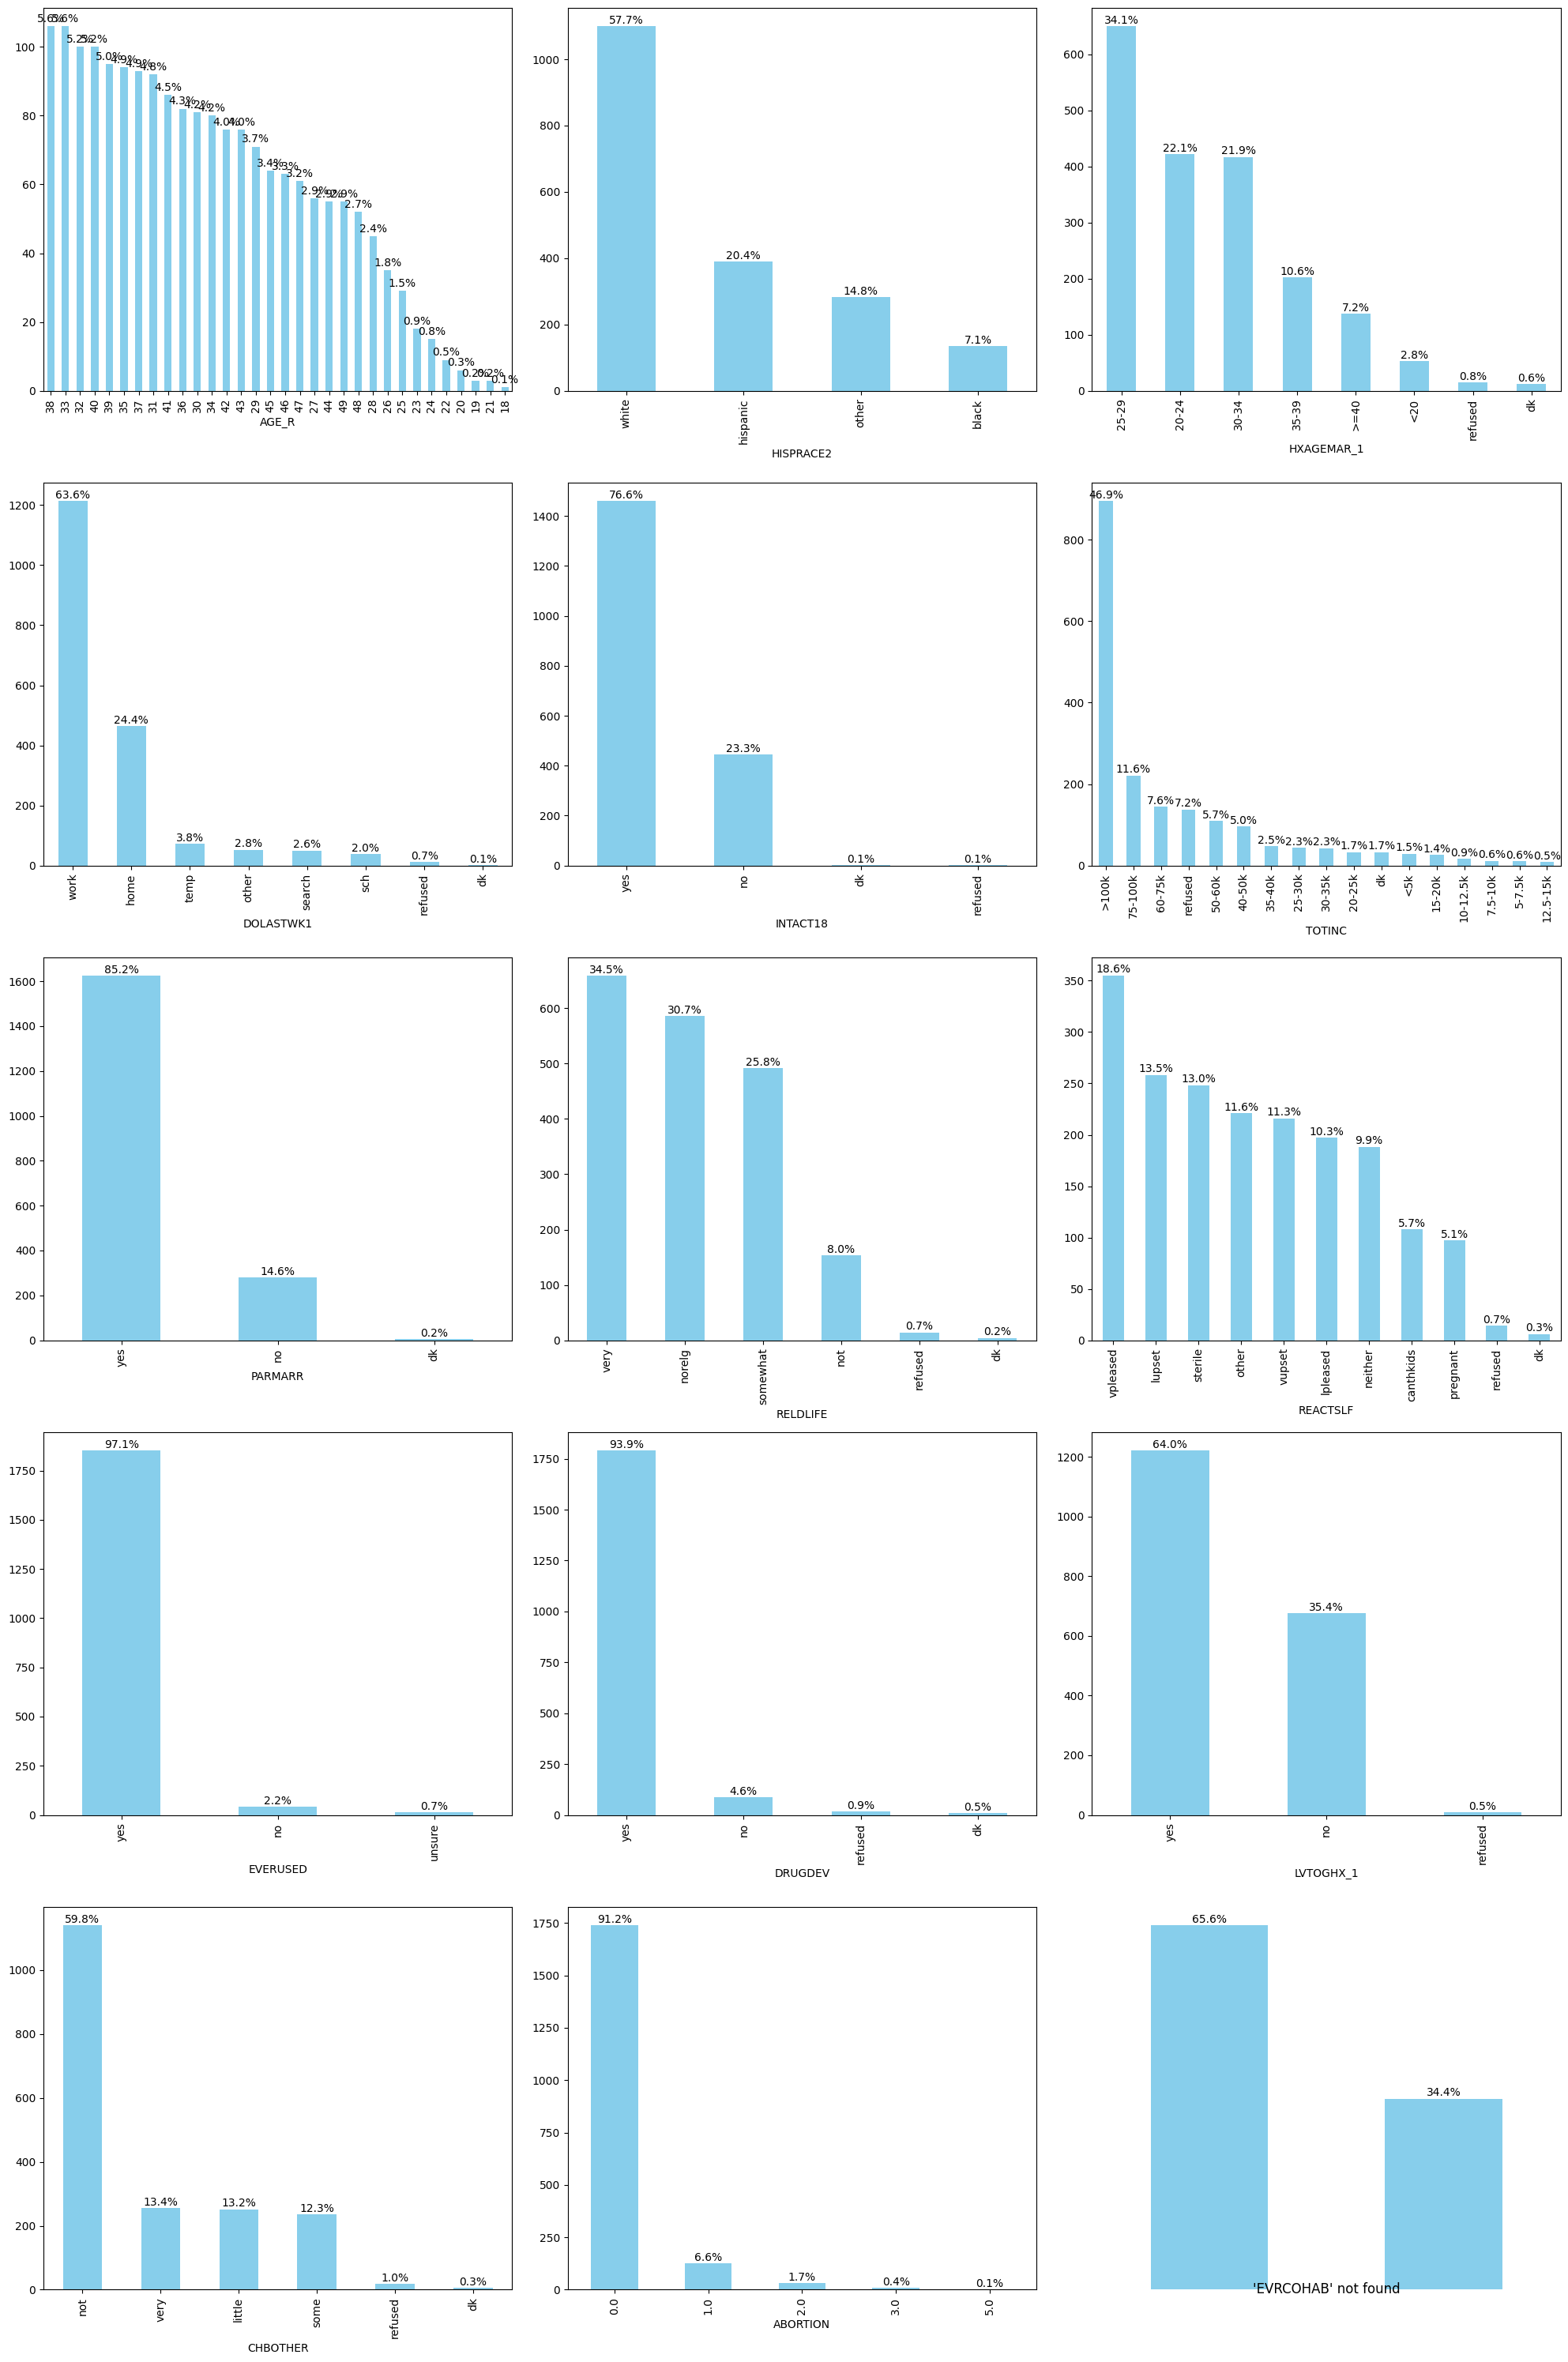

In [650]:
#plotting the div_married data to show the distribution of the data using a bar chart subplots.
n_cols = 3
n_rows = 5
columns=div_married.columns
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 30))

ax = ax.flatten()
for i, var in enumerate(columns):
    if var in div_married.columns:
        value_counts = div_married[var].value_counts()
        total = value_counts.sum()  # Total count for calculating percentages
        value_counts.plot.bar(ax=ax[i], color="skyblue")
#changing it into percentages
        for index, value in enumerate(value_counts.values):
            percentage = (value / total) * 100
            ax[i].text(index, value + 0.5, f"{percentage:.1f}%", 
                       ha='center', va='bottom', fontsize=10)
else:
    ax[i].text(0.5, 0.5, f"'{var}' not found", fontsize=12, ha="center", va="center")
    ax[i].axis("off")

plt.tight_layout()
plt.show()

Key Highlights
1. Age - Most of the Rs still married to their first husbands are 30 years and above.
2. Race - Most are White(2), followed by Hispanics(1), Other(4) then Black (3)
3. Age of 1st husband - 25-29yrs was the most common age of first husband at time of marriage
4. Contraceptive use - Most have used contraception in form of drugs and devices.
5. 11% of those still married have had an induced abortion once or more times.

### Univariate analysis of 'Divorced'(MARENDHX_1= 2.0)

In [651]:
# Doing analysis on those whose marriage to their first husbands ended in divorce.
div_div=div_to_keep.loc[(div_to_keep.MARENDHX_1 == 2.0)]
div_div

,MARENDHX_1,AGE_R,HISPRACE2,HXAGEMAR_1,DOLASTWK1,INTACT18,TOTINC,PARMARR,RELDLIFE,REACTSLF,EVERUSED,DRUGDEV,LVTOGHX_1,CHBOTHER,ABORTION,EVRCOHAB
4,2.0,49,black,20-24,home,yes,75-100k,yes,norelg,sterile,yes,yes,no,not,0.0,no
9,2.0,44,white,25-29,work,yes,75-100k,no,somewhat,sterile,yes,yes,yes,not,0.0,yes
16,2.0,42,white,20-24,work,no,25-30k,yes,norelg,canthkids,yes,yes,yes,not,0.0,yes
21,2.0,23,hispanic,25-29,work,yes,10-12.5k,no,very,vupset,yes,yes,yes,not,0.0,yes
36,2.0,34,white,20-24,work,yes,75-100k,yes,somewhat,vupset,yes,yes,no,little,1.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,2.0,37,white,30-34,work,yes,60-75k,yes,norelg,sterile,yes,yes,yes,not,0.0,yes
5567,2.0,35,white,25-29,home,yes,12.5-15k,no,norelg,sterile,yes,yes,yes,not,0.0,yes
5568,2.0,45,white,35-39,work,yes,40-50k,yes,somewhat,sterile,yes,yes,yes,not,0.0,yes
5570,2.0,46,other,20-24,home,no,35-40k,yes,norelg,lpleased,yes,yes,yes,little,0.0,yes


In [652]:
#dropping the EVMARRY and MARENDHX_1 columns
div_div = div_div.drop(['MARENDHX_1'], axis=1)
div_div.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 4 to 5574
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE_R       608 non-null    int64  
 1   HISPRACE2   608 non-null    object 
 2   HXAGEMAR_1  608 non-null    object 
 3   DOLASTWK1   608 non-null    object 
 4   INTACT18    608 non-null    object 
 5   TOTINC      608 non-null    object 
 6   PARMARR     608 non-null    object 
 7   RELDLIFE    608 non-null    object 
 8   REACTSLF    608 non-null    object 
 9   EVERUSED    608 non-null    object 
 10  DRUGDEV     608 non-null    object 
 11  LVTOGHX_1   608 non-null    object 
 12  CHBOTHER    608 non-null    object 
 13  ABORTION    608 non-null    float64
 14  EVRCOHAB    608 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 76.0+ KB


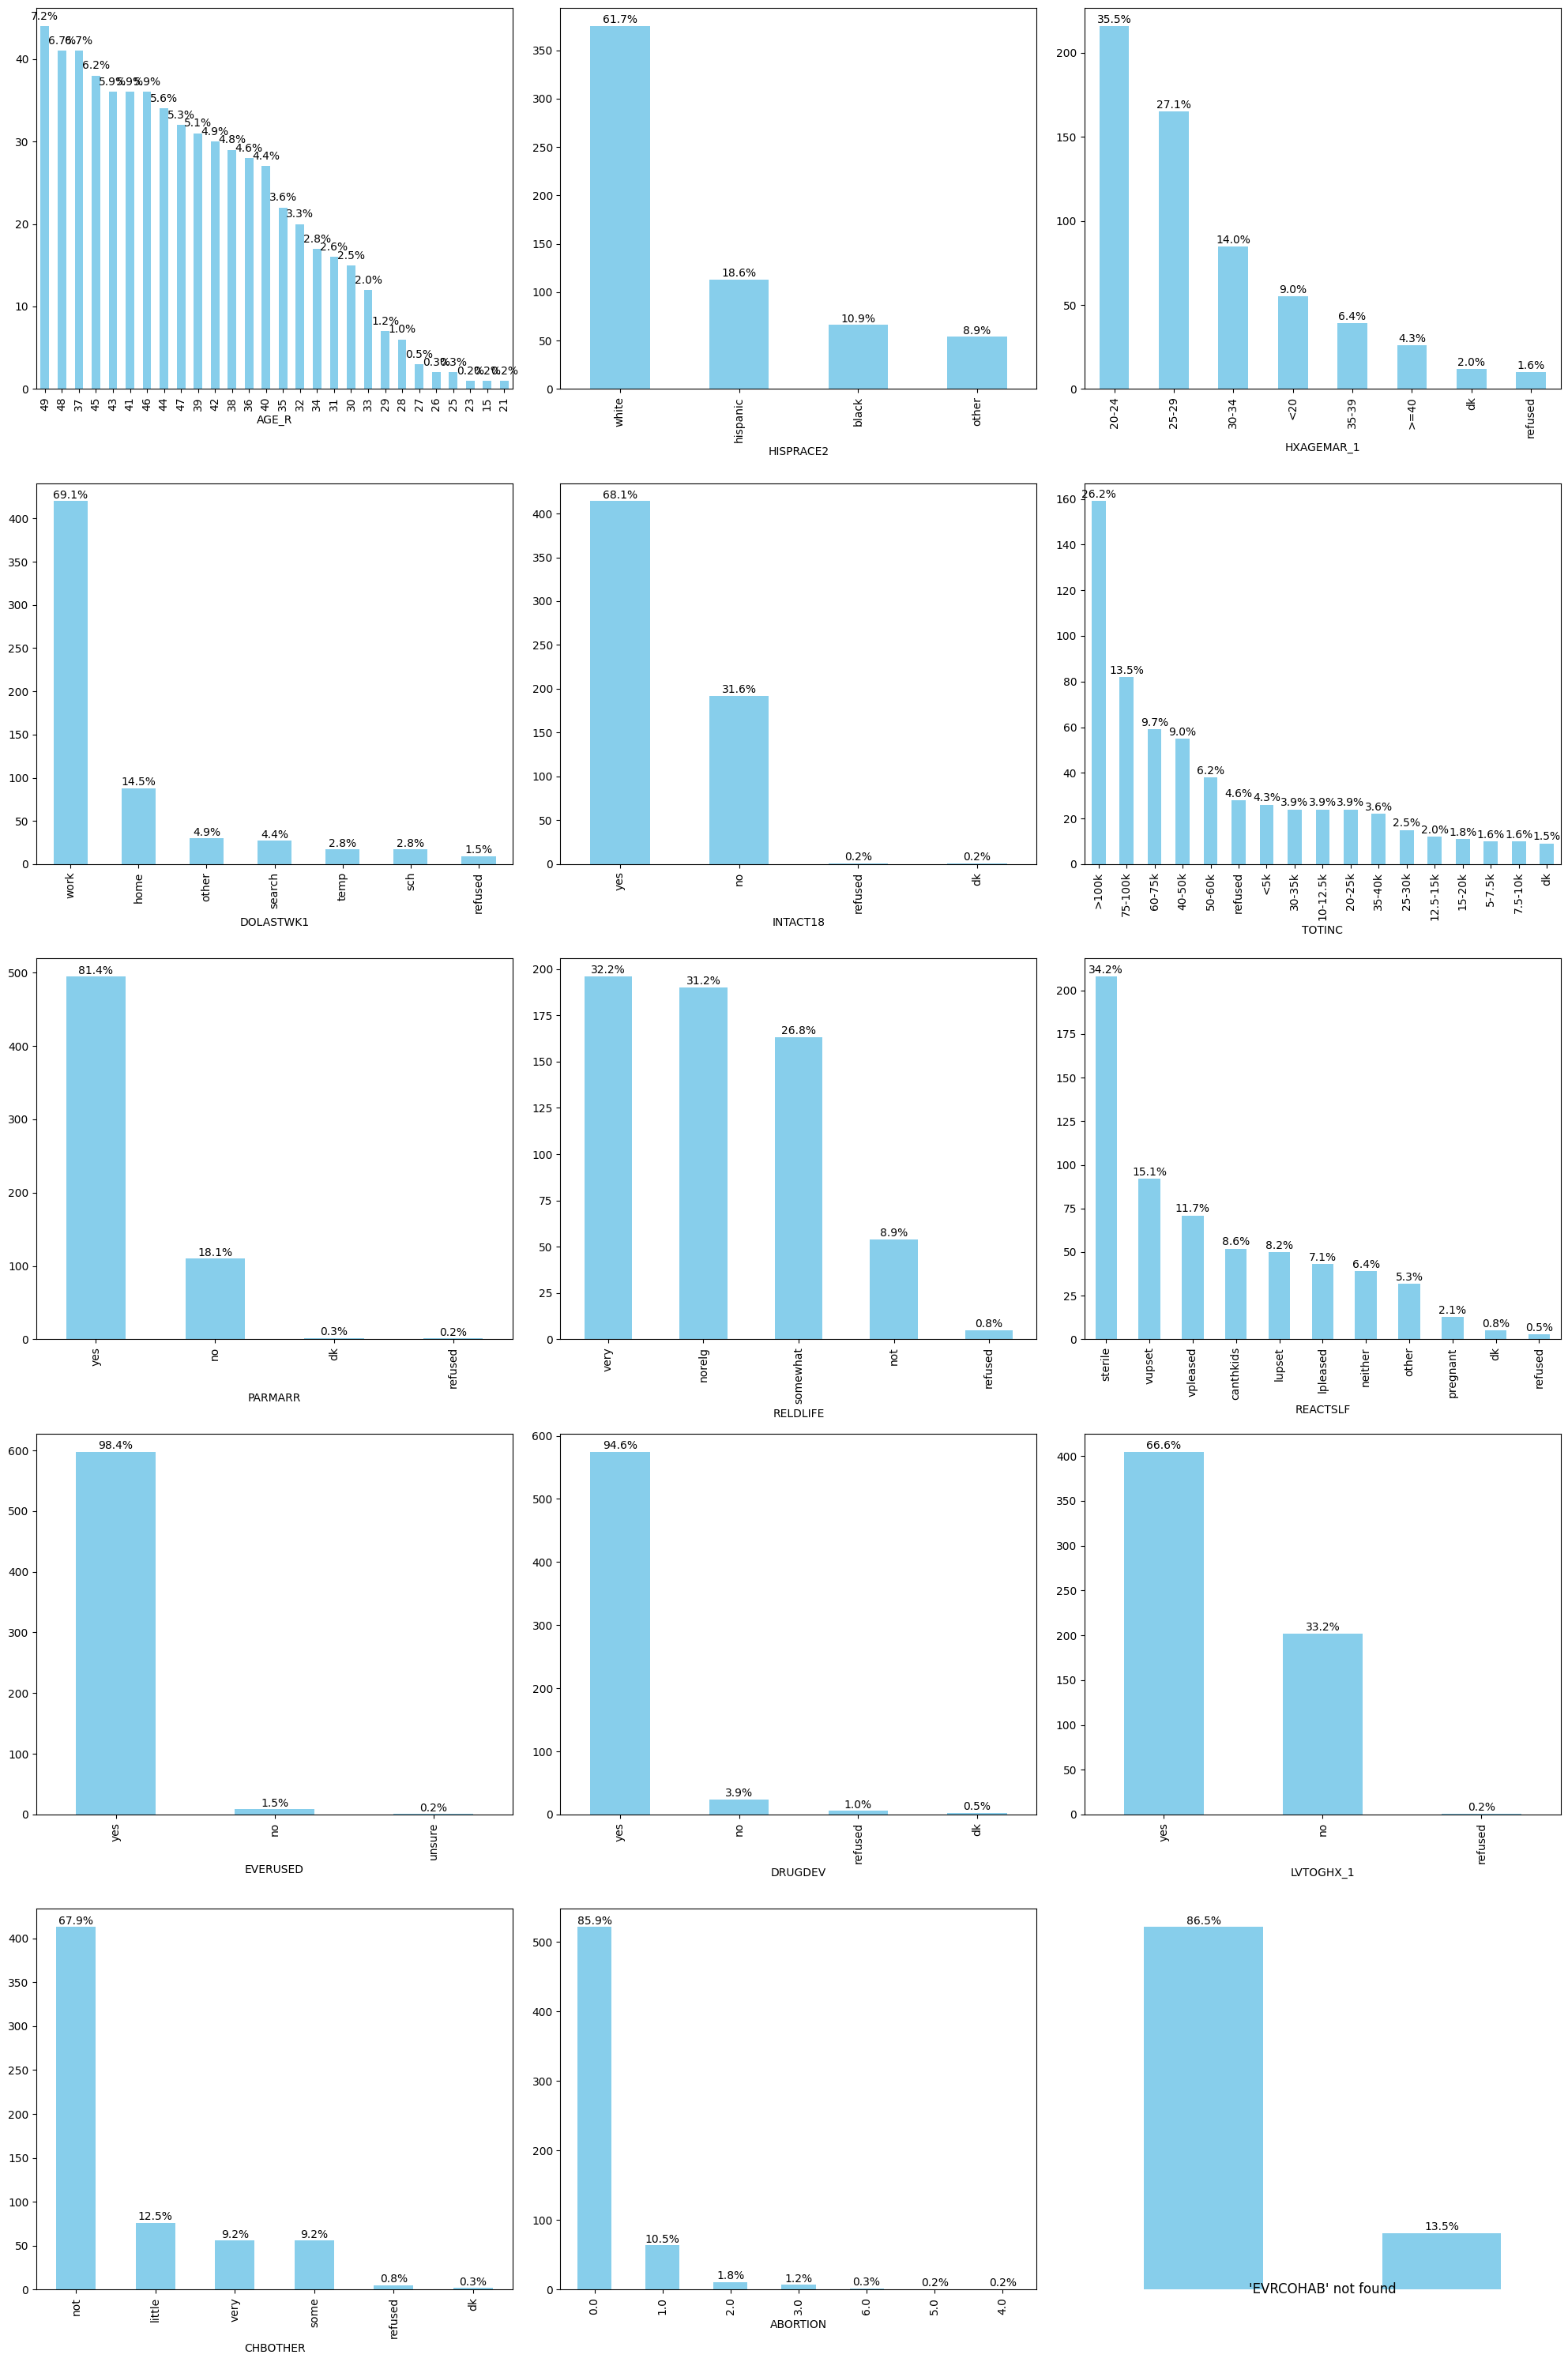

In [653]:
#plotting the div_married data to show the distribution of the data using a bar chart subplots.
n_cols = 3
n_rows = 5
columns=div_div.columns
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 30))

ax = ax.flatten()
for i, var in enumerate(columns):
    if var in div_div.columns:
        value_counts = div_div[var].value_counts()
        total = value_counts.sum()  # Total count for calculating percentages
        value_counts.plot.bar(ax=ax[i], color="skyblue")
#changing it into percentages
        for index, value in enumerate(value_counts.values):
            percentage = (value / total) * 100
            ax[i].text(index, value + 0.5, f"{percentage:.1f}%", 
                       ha='center', va='bottom', fontsize=10)
else:
    ax[i].text(0.5, 0.5, f"'{var}' not found", fontsize=12, ha="center", va="center")
    ax[i].axis("off")

plt.tight_layout()
plt.show()

Key Highlights
1. Age - Most of the Rs ever divorced are 35 years and above.
2. Race - Most are White(2), followed by Hispanics(1), Blacks(3) then other (4)
3. Age of 1st husband - The most of those ever divorced reported that they got married when their husbands were 20-24yrs
4. Contraceptive use - Most have used contraception in form of drugs and devices.
5. 16.9% of those ever divorced have had an induced arbortion 1 or more times.

### Bi-Variate analysis of married vs divorced

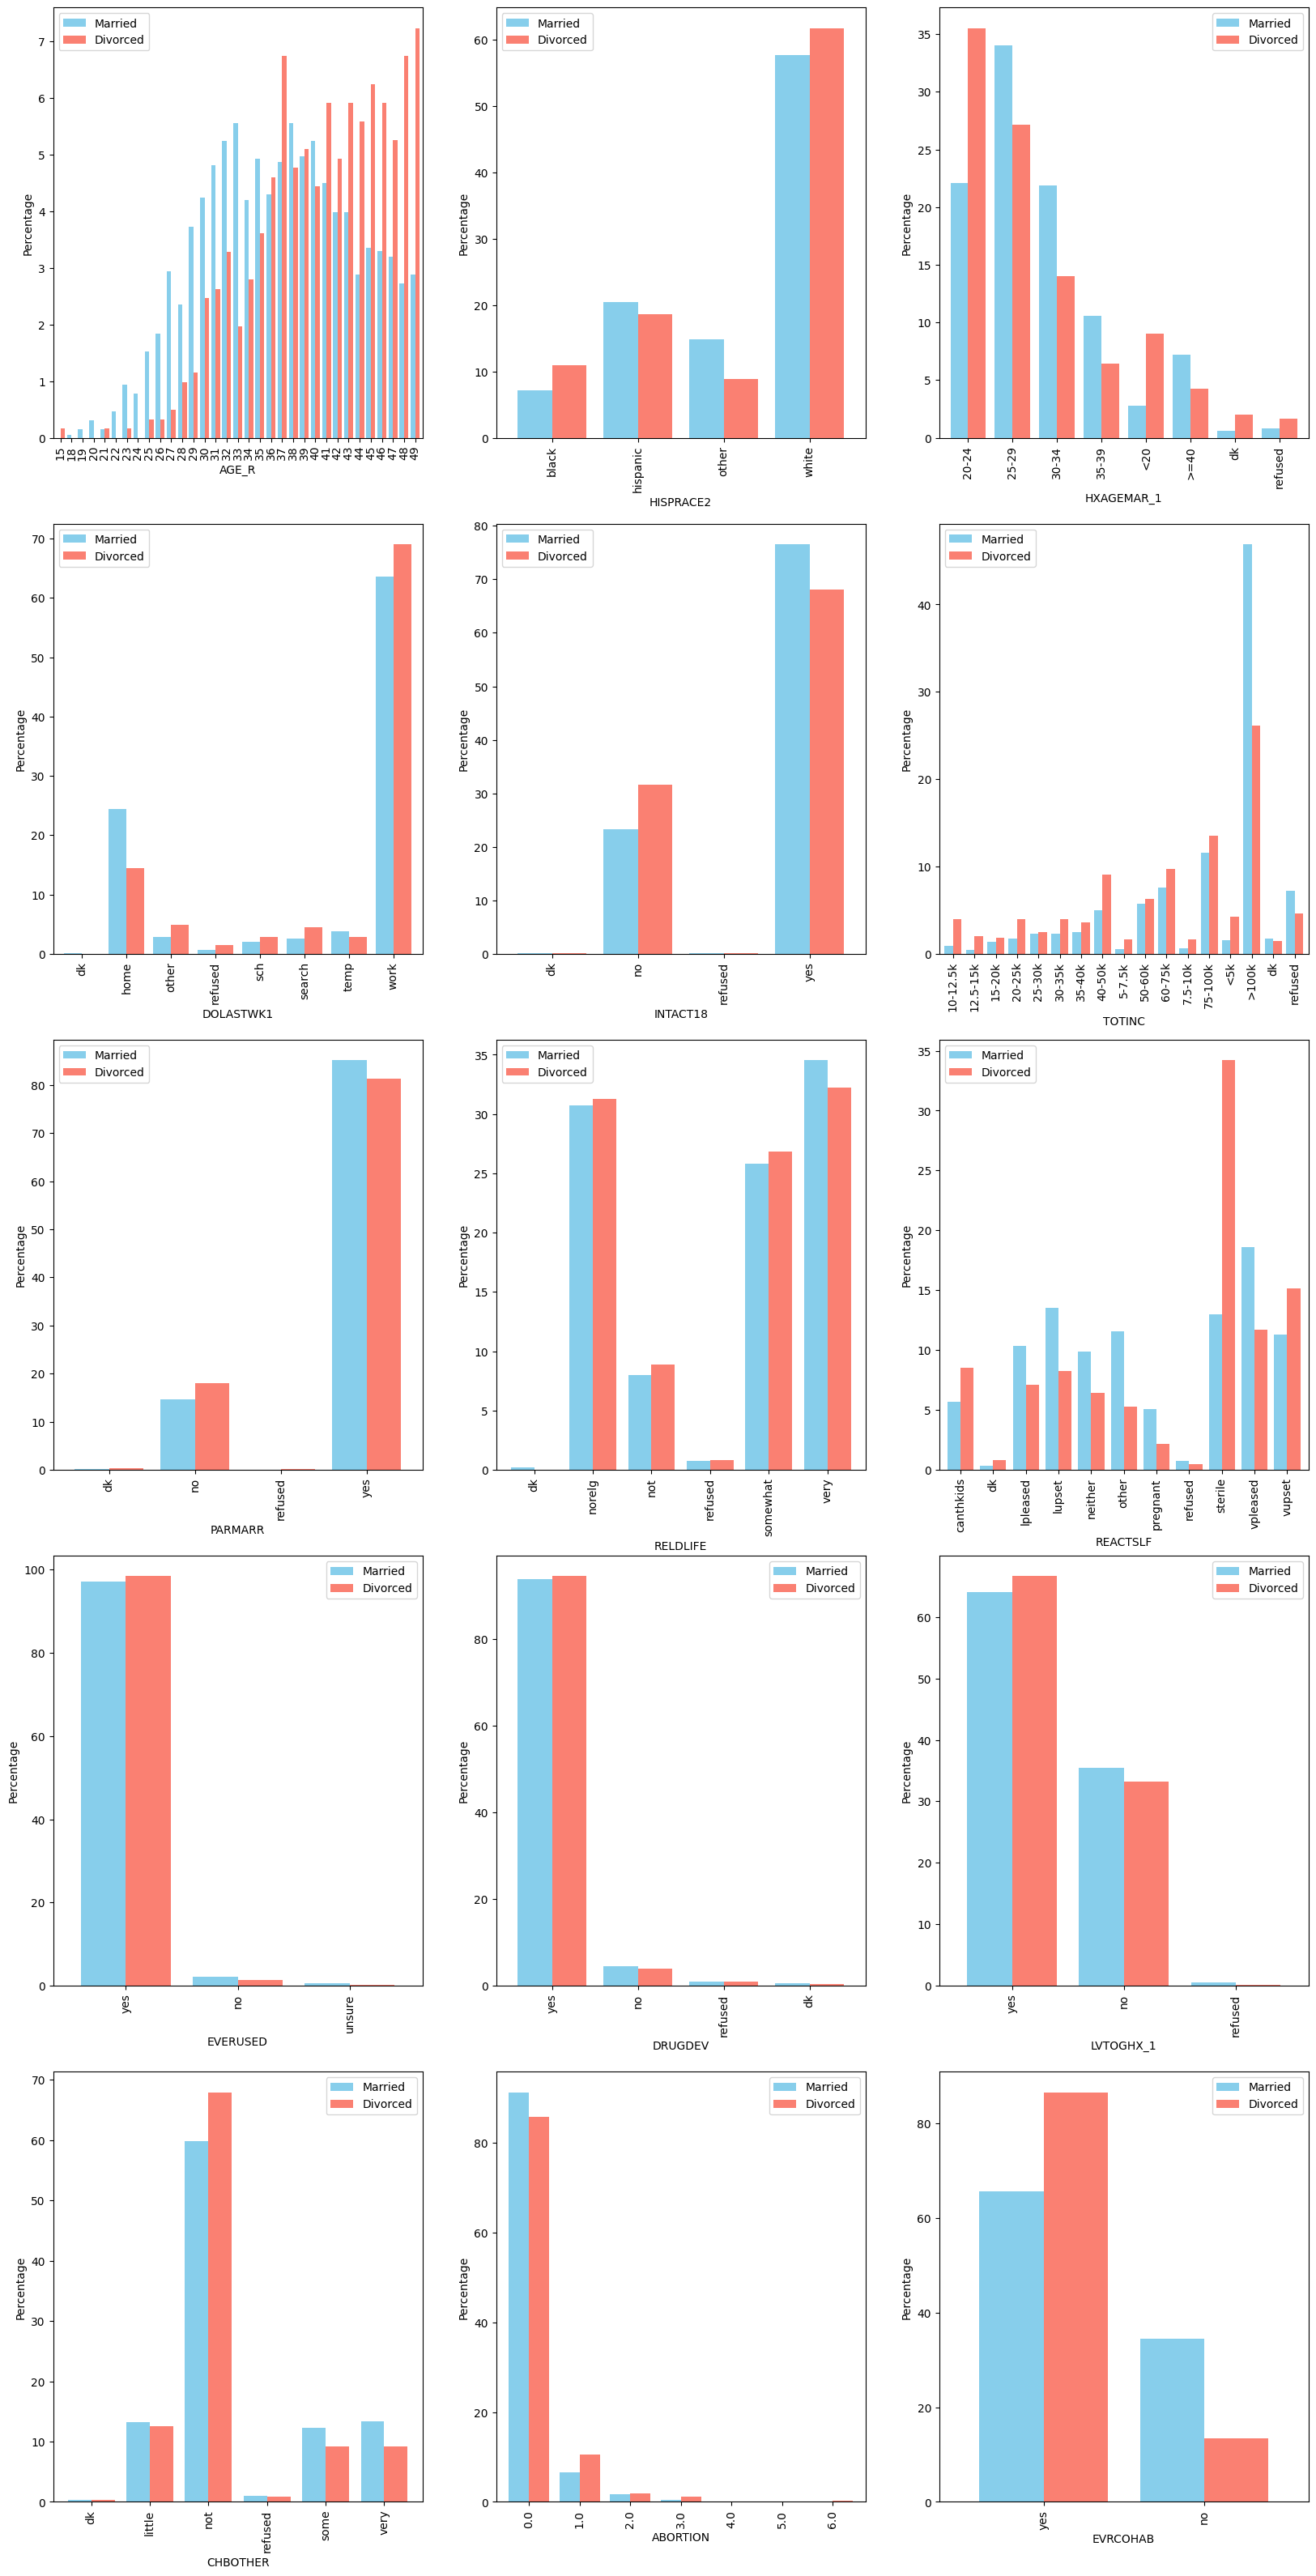

In [654]:
#comparison of the two distribution percentages.

n_cols = 3
n_rows = 5
columns=div_div.columns
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 40))
ax = ax.flatten()

# Loop through the variables and plot each one
for i, var in enumerate(columns):
    if var in div_married.columns and var in div_div.columns:
        # Calculate value counts as percentages for both datasets
        married_counts = div_married[var].value_counts(normalize=True) * 100
        divorced_counts = div_div[var].value_counts(normalize=True) * 100

        # Combine into a single DataFrame for plotting
        comparison_df = pd.DataFrame({
            "Married": married_counts,
            "Single": divorced_counts
        }).fillna(0)

        # Plot grouped bar chart
        comparison_df.plot(kind="bar", ax=ax[i], color=["skyblue", "salmon"], width=0.8)

        # Set titles and labels
        
        ax[i].set_ylabel("Percentage")
        ax[i].legend(["Married", "Divorced"])

Key Differences between Still Married vs Divorced:
1. Age - The percentages of the age of the 'ever' divorced respondents is left tailed. As age increases, the percentage of divorced increases.
2. Race - While white Rs (2) had the highest number of both marriage and divorce percentages, Black Rs(3) had a higher divorce rate than relative marriage rate.
3. Age of 1st husband at marriage seems to have a big impact on divorce and marriage factors. A big percentage of those divorced were married to younger husbands.(20 - 24yrs) compared to still married (25-29yrs)
4. 31% of those who divorced their 1st husbands did not have an intact family upto 18 years, compared to 23.3% of those who are still married.
5. Total Family income - Those who are still married to their first husbands have a higher income percentage than those divored.
6. Ever Cohabited - a big percentage of those who divorced have ever cohabited with a non-marital male partner.


### Multivariate analysis

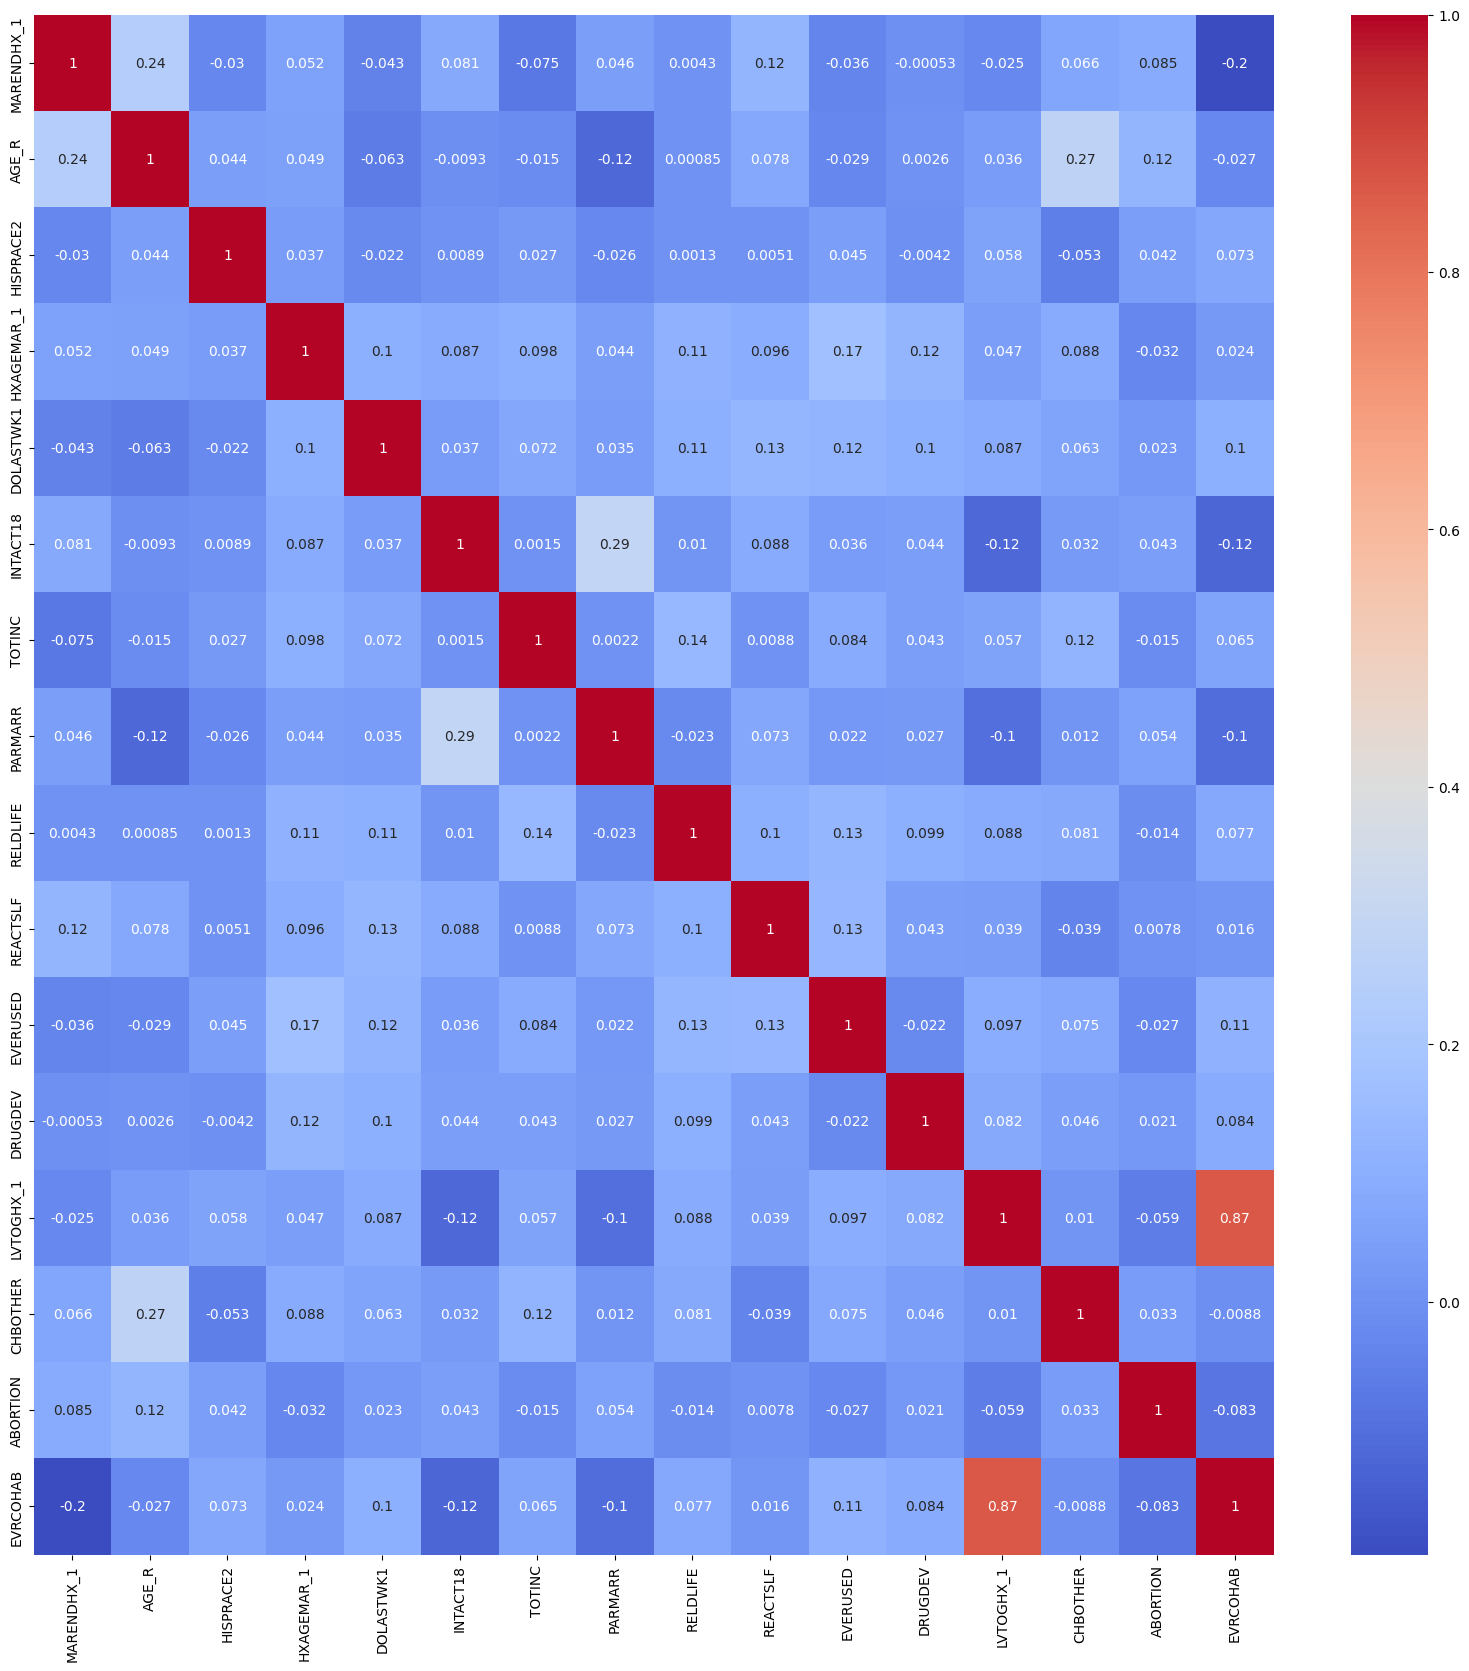

In [655]:
#creating a pairwise plot for the whole data.
plt.figure(figsize=(20, 20))
sns.heatmap(div_to_keep_copy.corr(), annot=True, cmap='coolwarm')
plt.show()

General relationships:
- Positive relationships
1. Age has a positive correlationship with marriage status, the number of abortions one had, whether they'd be bothered with having more children.

2. The age of the first husband at marriage has a positive relationship with the importance of religion, if r grew in an intact family, if one used contraceptives.

3. The highest strongest positive correlation is between if one has ever cohabited and if they cohabited with the 1st husband.
4. The importance of religious life and if a person ever used contraception.

- Negative relationships
1. There is a negative correlationship between ever cohabitting and cohabitting before 1st marriage and if the R living in an intact family or if parents were married
at birth.

2. There is a negative correlationship between ever cohabitting and whether the the respondent being still married or divorced to the first husband.

### Train Test Splitting

In [656]:
#confirming the columns in the copy
div_to_keep_copy.columns

Index(['MARENDHX_1', 'AGE_R', 'HISPRACE2', 'HXAGEMAR_1', 'DOLASTWK1',
       'INTACT18', 'TOTINC', 'PARMARR', 'RELDLIFE', 'REACTSLF', 'EVERUSED',
       'DRUGDEV', 'LVTOGHX_1', 'CHBOTHER', 'ABORTION', 'EVRCOHAB'],
      dtype='object')

In [657]:
div_to_keep_copy.shape

(2516, 16)

In [658]:
div_to_keep.MARENDHX_1.value_counts()

MARENDHX_1
0.0    1908
2.0     608
Name: count, dtype: int64

In [659]:
# dropping the target column.
X = div_to_keep_copy.drop('MARENDHX_1', axis=1) 
y = div_to_keep_copy['MARENDHX_1']  # Target (0-married,2-divorced)


In [660]:
#importing the necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import linear_model

In [661]:
#Splitting into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [662]:
#standardizing the both the test and train X
scaler = StandardScaler()
standardized_X_train = scaler.fit_transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [663]:
#applying the logistic regression model with Lasso regularization to shrink the coefficient of less important features.
logreg = LogisticRegression(penalty='l1', 
        C=1.0, #will adjust based on regularization outcomes
        solver='saga', #can use liblinear for alternate results
        random_state=42)
#fitting the model
logreg.fit(standardized_X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='saga')

In [664]:
#applying the logistic regression model with lasso regularization and 'liblinear solver' to shrink the coefficient of less important features.
logreg2 = LogisticRegression(penalty='l1', 
        C=1.0, #will adjust based on regularization outcomes
        solver='liblinear', #can use liblinear for alternate results
        random_state=42)
#fitting the model
logreg2.fit(standardized_X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [665]:
#applying the logistic regression model with ridge regularization and 'liblinear solver' to shrink the coefficient of less important features.
logreg3 = LogisticRegression(penalty='l2', 
        C=1.0, #will adjust based on regularization outcomes
        solver='liblinear', #can use liblinear for alternate results
        random_state=42)
#fitting the model
logreg3.fit(standardized_X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [666]:
#applying the logistic regression model with ridge regularization and 'saga' to shrink the coefficient of less important features.
logreg4 = LogisticRegression(penalty='l2', 
        C=1.0, #will adjust based on regularization outcomes
        solver='saga', #can use liblinear for alternate results
        random_state=42)
#fitting the model
logreg4.fit(standardized_X_train, y_train)

LogisticRegression(random_state=42, solver='saga')

In [667]:
#predicting using the model
y_pred = logreg.predict(standardized_X_test)
y_pred2 = logreg2.predict(standardized_X_test)
y_pred3 = logreg3.predict(standardized_X_test)
y_pred4 = logreg4.predict(standardized_X_test)

In [668]:
#evaluating the model's prediction using the classification report.
print('Lasso and saga\n', classification_report(y_test,y_pred))
print('Lasso and liblinear\n', classification_report(y_test, y_pred2))
print('Ridge and liblinear\n', classification_report(y_test, y_pred3))
print('Ridge and saga\n', classification_report(y_test, y_pred4))


Lasso and saga
               precision    recall  f1-score   support

         0.0       0.79      0.95      0.86       377
         2.0       0.65      0.24      0.35       127

    accuracy                           0.78       504
   macro avg       0.72      0.60      0.61       504
weighted avg       0.75      0.78      0.74       504

Lasso and liblinear
               precision    recall  f1-score   support

         0.0       0.79      0.95      0.86       377
         2.0       0.65      0.24      0.35       127

    accuracy                           0.78       504
   macro avg       0.72      0.60      0.61       504
weighted avg       0.75      0.78      0.74       504

Ridge and liblinear
               precision    recall  f1-score   support

         0.0       0.79      0.95      0.86       377
         2.0       0.65      0.24      0.35       127

    accuracy                           0.78       504
   macro avg       0.72      0.60      0.61       504
weighted avg    

From the classification report, regularization using the Lasso and the liblinear solver yielded better results.
1. For 0.0(still married), precision, recall and f1-score were high.
2. For 2.0(divorced), the precision was above 0.5 but the recall and f1-score were a bit lower.
3. The accuracy for both is 0.78. This is a depiction of how often the model is correct.

[[360  17]
 [ 96  31]]


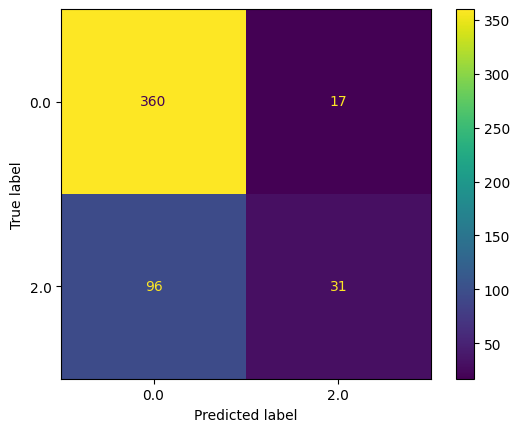

In [669]:
#evaluating the model using a confusion matrix of the y_pred2
print(confusion_matrix(y_test,y_pred2))
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2), display_labels = [0.0, 2.0])
cm_display.plot()
plt.show()

In [670]:
#prediction probabilities
probabilities = logreg2.predict_proba(standardized_X_test)  # Output: Probabilities for both classes
print("Predicted Probabilities:\n", probabilities)

Predicted Probabilities:
 [[0.81459118 0.18540882]
 [0.67624353 0.32375647]
 [0.93887486 0.06112514]
 ...
 [0.82764133 0.17235867]
 [0.93040067 0.06959933]
 [0.88554254 0.11445746]]


Since there are many probabilities based on different coefficient combinations for 504 standardized N respondents, we will try and see which features are important.

In [671]:
#Identifying Feature Importance using co-efficients

feature_names = X_train.columns

coefficients = logreg2.coef_[0]
importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': abs(coefficients)
}).sort_values(by='Importance', ascending=False)

print(importance)

       Feature  Coefficient  Importance
14    EVRCOHAB    -1.476011    1.476011
11   LVTOGHX_1     1.106792    1.106792
0        AGE_R     0.589070    0.589070
8     REACTSLF     0.282668    0.282668
5       TOTINC    -0.164474    0.164474
4     INTACT18     0.131480    0.131480
3    DOLASTWK1    -0.118339    0.118339
13    ABORTION     0.117582    0.117582
2   HXAGEMAR_1     0.109879    0.109879
9     EVERUSED    -0.097669    0.097669
6      PARMARR     0.094810    0.094810
1    HISPRACE2    -0.078103    0.078103
12    CHBOTHER    -0.010972    0.010972
10     DRUGDEV    -0.009520    0.009520
7     RELDLIFE    -0.004154    0.004154


A positive coefficient indicates the feature increases the likelihood of class 1 (e.g., divorce).
These are:
- Living together with 1st husband before marriage.
- Age - we saw from our EDA that older Rs were more likely to be divorced more than the younger Rs.
- Reaction is one was pregnant. 
- If one lived in an intact family upto 18 had an impact.
- Having had an abortion also impacted the likelihood of ever being divorced.
- The age of 1st husband at marriage had an impact. From the EDA we saw that most Rs who had been divorced had gotten married at lower husband ages.
- Thou the smallest coefficient, an Rs parents being married at her birth had an positive impact on likelihood of divorce.



A negative coefficient indicates the feature increases the likelihood of class 0 (e.g., marriage).
- Having ever cohabited with a male increased the likelihood of one being married. This makes sense since a large percentage of the Rs had ever cohabited.
- The total income increases the likelihood of one being married. Higher family incomes were reported by married Rs.
- Work also has an impact on the likelihood of marriage. From EDA, married Rs had a higher percentage of care-giving work than ever divorced. 
- Contraception use was widespread amongst both divorced and married. A person who had everused was likely to be married. However, whether the contraception was
a drug or device has a lower impact on marriage.
- Race had an impact on whether Rs who stayed married to their 1st husbands.
- Religious life had an impact on whether R stayed married to their first husbands.

Larger absolute values indicate more importance.

### Predicting the probability of outcomes (married/divorced) based on a created respondent.

In [672]:

intercept = logreg2.intercept_[0]  
print(f"Intercept (β0): {intercept}")

Intercept (β0): -1.3908859935315738


In [694]:
#creating a respondent with specific variable values.
coefficients = {
    "EVRCOHAB": -1.476011,
    "LVTOGHX_1": 1.106792,
    "AGE_R": 0.589070,
    "REACTSLF": 0.282668,
    "TOTINC": -0.164474,
    "INTACT18": 0.131480,
    "DOLASTWK1": -0.118339,
    "ABORTION": 0.117582,
    "HXAGEMAR_1": 0.109879,
    "EVERUSED": -0.097669,
    "PARMARR": 0.094810,
    "HISPRACE2": -0.078103,
    "CHBOTHER": -0.010972,
    "DRUGDEV": -0.009520,
    "RELDLIFE": -0.004154
}
feature_values = {
    "EVRCOHAB": 5,
    "LVTOGHX_1": 5,
    "AGE_R": 35,
    "REACTSLF": 1,
    "TOTINC": 15,
    "INTACT18": 1,
    "DOLASTWK1": 5,
    "ABORTION": 0,
    "HXAGEMAR_1": 3,
    "EVERUSED": 1,
    "PARMARR": 1,
    "HISPRACE2": 2,
    "CHBOTHER": 4,
    "DRUGDEV": 1,
    "RELDLIFE": 1
}

# Compute log-odds
log_odds = intercept + sum(coefficients[feature] * feature_values[feature] for feature in coefficients)

# Compute probability using sigmoid function
probability = 1 / (1 + np.exp(-log_odds))

print(f"Log-odds: {log_odds}")
print(f"Probability of being married: {probability:.2f}")
print(f"Probability of being divorced: {1 - probability:.2f}")

Log-odds: 14.848822006468426
Probability of being married: 1.00
Probability of being divorced: 0.00


### Reporting

Even after tweaking the parameters of the created respondent, there seems to be little change in the likelihood of being divorced/still married.


The intercept, representing external factors outside of the variables, has more weight than the considered variables. This implies that factors outside of the considered variables have a greater play.



## Predicting with only 1 variables - DRUGDEV (whether contraceptive in question was a drug/device or not)

In [674]:
#recreating a dataframe to achieve only 2 variables.
div_to_keep_copy.columns

Index(['MARENDHX_1', 'AGE_R', 'HISPRACE2', 'HXAGEMAR_1', 'DOLASTWK1',
       'INTACT18', 'TOTINC', 'PARMARR', 'RELDLIFE', 'REACTSLF', 'EVERUSED',
       'DRUGDEV', 'LVTOGHX_1', 'CHBOTHER', 'ABORTION', 'EVRCOHAB'],
      dtype='object')

In [675]:
div_2_vars = div_to_keep_copy[['MARENDHX_1', 'DRUGDEV']]
div_2_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 3 to 5583
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MARENDHX_1  2516 non-null   float64
 1   DRUGDEV     2516 non-null   float64
dtypes: float64(2)
memory usage: 59.0 KB


There are no null values so we can proceed with the statistical data analysis.

DRUGDEV
1.0     2367
5.0      112
98.0      24
99.0      13
Name: count, dtype: int64


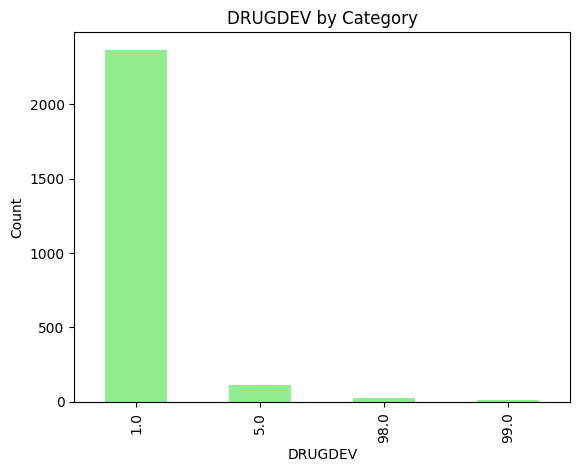

In [676]:
ddcounts = div_2_vars.DRUGDEV.value_counts()
print(ddcounts)
ddcounts.plot(kind='bar', color='lightgreen')
plt.xlabel('DRUGDEV')
plt.ylabel('Count')
plt.title('DRUGDEV by Category')
plt.show()

<Axes: xlabel='DRUGDEV', ylabel='MARENDHX_1'>

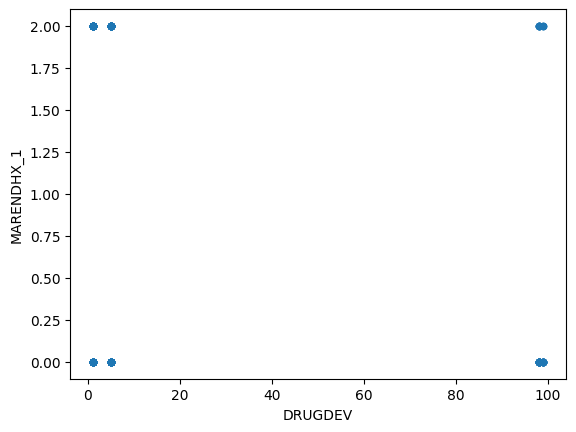

In [677]:
#catter plot to see if there is a linear relationship between the method of contraceptive used and the marriage status.
div_2_vars.plot.scatter(x='DRUGDEV',y='MARENDHX_1')

In [678]:
#grouping to see the distribution
grouped_div2 = div_2_vars.groupby(['DRUGDEV', 'MARENDHX_1']).size().reset_index()
grouped_div2.rename(columns={0:'count'}, inplace=True)
grouped_div2

,DRUGDEV,MARENDHX_1,count
0,1.0,0.0,1792
1,1.0,2.0,575
2,5.0,0.0,88
3,5.0,2.0,24
4,98.0,0.0,18
5,98.0,2.0,6
6,99.0,0.0,10
7,99.0,2.0,3


In [679]:
# dropping the target column in preparation for train - test splitting
X2 = div_2_vars.drop('MARENDHX_1', axis=1) 
y2 = div_2_vars['MARENDHX_1']  # Target (0-married,2-divorced)


In [680]:
#Changing the test size to 0.3 to include allowance for cross-validation tests
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [681]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

In [682]:
#creating a pipeline to handle the automatically deal with standardization and modelling with balanced weights.
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('logistic', LogisticRegression(class_weight='balanced'))])

In [683]:
#since we have an imbalance in the distribution of our variables (more are married), we will use cross-validation using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Even with tweaking the number of splits, the mean accuracy remains pretty similar with 5 splits giving the best accuracy

In [684]:
scores = cross_val_score(pipeline, X2, y2, cv=cv, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.7281746  0.73558648 0.72166998 0.28429423 0.27435388]
Mean Accuracy: 0.5488158351478432


In [685]:
#Now we can train the model on the training data
pipeline.fit(X2_train, y2_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [686]:
#generating the predictions
y2_pred = pipeline.predict(X2_test)

In [687]:
#generating a classification score
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred, zero_division=0))

Accuracy: 0.7165562913907285
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.95      0.83       564
         2.0       0.21      0.04      0.07       191

    accuracy                           0.72       755
   macro avg       0.47      0.49      0.45       755
weighted avg       0.61      0.72      0.64       755



Even with cross-validation, it is difficult to predict the outcomes of a marriage based on whether the contraception they used was a drug-or-device(=1.0)
i.e modern method of contraception or it was not/traditional (=5.0)
There were sample size for the divorced (2.0) was so small the model almost always got it wrong even with a better performing general accuracy score.


[[533  31]
 [183   8]]


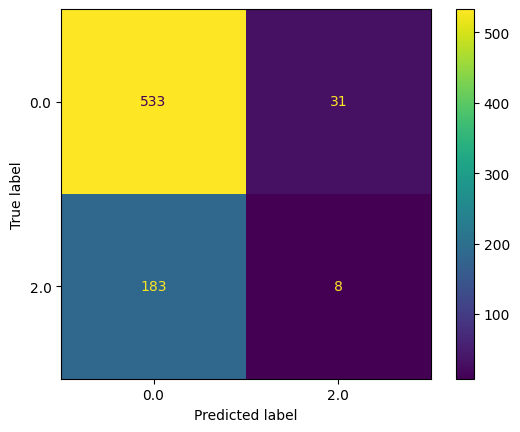

In [688]:
print(confusion_matrix(y2_test,y2_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix(y2_test, y2_pred), display_labels = [0.0, 2.0])
cm_display.plot()
plt.show()

#### Analysing the confusion matrix
- True Positives - The model predicted that a person would still be married and got it right in 533/755 cases
- False Negatives - The model predicted that a person had been divorced and got it right in 8/755 cases
- True Negative - The model predicted that a person would still be married and got it wrong in 183/755 cases
- False Positive - The model predicted that a person would be divorced but they were married in 31/755 cases

The average accuracy is still high because the model got it right in more instances than it got wrong.
